# [ Logistic Regression ]

- 이산적인 Label data라면 어떻게 학습해야할까?
    - ex) 스팸 메일인가 아닌가, 정상품인가 불량품인가..
<br>
<br/>
- Regression이라는 단어가 사용되지만 0과 1을 분류하는, 즉 '이진 분류(binary classification)' 모델

- 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용됨
- 추정 확률이 50%(0.5)가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측

## 로지스틱 회귀의 필요성
- 선형회귀의 단점 : 이상치를 분류하지 못함
    - 선형 회귀(Linear Regression)에서는 가설 $H(x)$로 직선($Wx+b$)을 사용한다. 
    - 하지만, 직선은 Outlier(이상치)에 약하기 때문에 분류 문제에 잘 동작하지 않는다.
<br>
<br/>

- 보통 로지스틱 회귀는 선형 함수에 시그모이드 함수가 적용된 것으로 표현 -> 즉 로지스틱 회귀는 "선형 분류 알고리즘"

## Sigmoid 함수
- Logistic regression을 진행하기 위해서는 출력 값을 0과 1의 값으로 변경
- Score를 0 과 1사이의 값으로 변경하기 위해 Sigmoid(logistic) function 을 사용
\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}


- Logistic regression을 진행할 때 입력 데이터를 $x$, 실제 class 값을 $y$, 예측된 출력 값을 $\hat{y}$라고 하면 $x$는 두가지 변환을 거쳐서 $\hat{y}$가 됨

$$z = wx + b$$
$$\hat{y} = \sigma(z)$$

---
- 선형회귀 모델과 같이, 로지스틱 회귀모델은 입력 특성의 가중치 합을 계산하고 편향을 더함
\begin{equation}
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

- 로지스틱 회귀 모델 예측  

$
\hat{y} =
 \begin{cases}
  0 & \hat{p} < 0.5 \\
  1 & \hat{p} >= 0.5
 \end{cases}
$

In [25]:
# 시그모이드(로지스틱) 함수식

x = sympy.Symbol('x', real=True) # 실수

logistic = 1/(1+ sympy.exp(-x))
logistic

1/(1 + exp(-x))

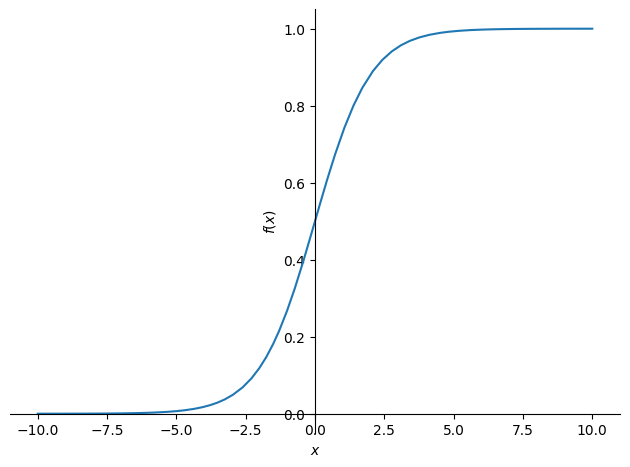

In [26]:
# 시그모이드 함수 그리기
sympy.plotting.plot(logistic)

In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


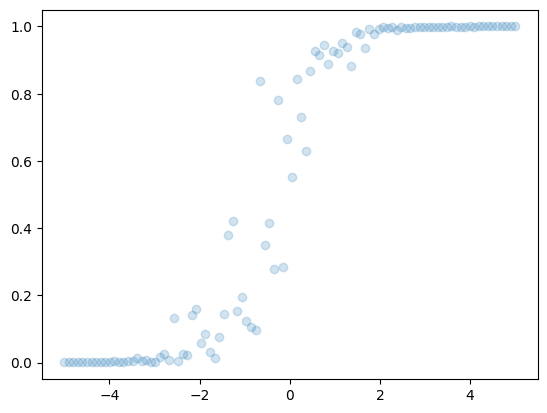

In [4]:
# noise를 추가한 Data

import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-5, 5, 100) # 범위 내 구간 채우기(구간 시작, 구간 끝, 구간 내 숫자 개수)

w = 2
b = 1

np.random.seed(0)
z_data = w * x_data + b + np.random.normal(size=len(x_data)) # numpy.random.normal(size=len(x_data)) noise 추가
y_data = 1 / (1+ np.exp(-z_data))

plt.scatter(x_data, y_data, alpha=0.2)

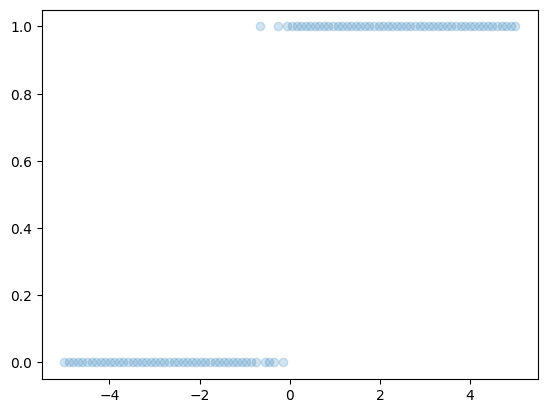

In [7]:
y_data = np.where(y_data >= 0.5, 1, 0)  # 0.5를 기준으로 0.5보다 크면 1, 작으면 0이라고 하자
plt.scatter(x_data, y_data, alpha=0.2)

## Logistic loss function : Binary Cross Entropy
- sigmoid를 최적화하기 위한 cost function : Cross Entropy(교차 엔트로피)
- Predict Data $\hat{y}$과 Label $y$가 가장 가깝게 되도록 하는 $w$와 $b$를 찾는것이 우리의 목표

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

- 선형회귀(Linear Regression)에서는 직선을 가설로 사용하고, MSE(Mean Square Error)를 비용 함수로 사용한다.

---

## Exercise

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.use(['seaborn-whitegrid']) # 테마 설정

In [5]:
# Sample data 를 이용해 Classification 진행
from sklearn.datasets import make_classification

samples = 1000
x, y = make_classification(n_samples=samples, n_features=2, 
                           n_informative=2, # 독립변수 중 종속변수와 상관관계가 있는 성분의 수
                           n_redundant=0, # 노이즈 개수
                           n_clusters_per_class=1) # 클래스당 클러스터의 개수 예) class 0 는 2개의 cluster로 분리된다

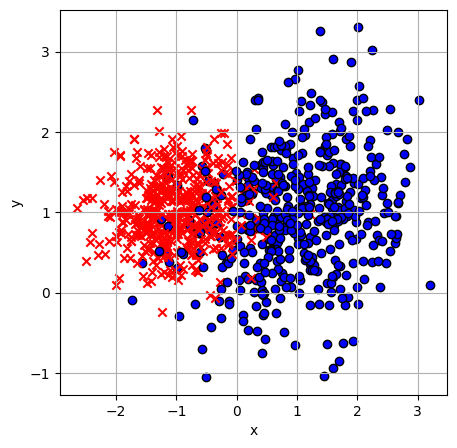

In [7]:
fig, ax = plt.subplots(1, 1 , figsize = (5,5))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

for i in range(samples):
  if y[i] == 0:
    ax.scatter(x[i, 0], x[i, 1], edgecolors = 'k', marker = 'x', color = 'r')
  else:
    ax.scatter(x[i, 0], x[i, 1], edgecolors = 'k', marker = 'o', color = 'b')

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [11]:
print(f'Train Data Score : {model.score(x_train, y_train)}')
print(f'Test Data Score : {model.score(x_test, y_test)}')

Train Data Score : 0.92625
Test Data Score : 0.91


In [12]:
scores = cross_val_score(model, x, y, cv = 10, scoring = 'accuracy')

print(f'CV mean score: {scores.mean()}')

CV mean score: 0.9189999999999999


In [13]:
model.intercept_, model.coef_

(array([1.23407636]), array([[ 3.42796067, -0.88791892]]))

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, -4.0, '−4'),
  Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

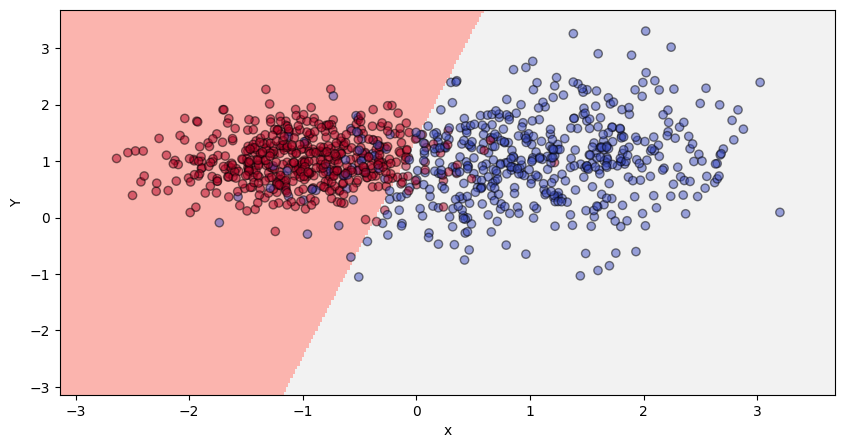

In [14]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5 
y_min, y_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02)) # 격자 데이터 생성
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel(): 다차원을 1차원으로 해체

# Test data를 용한 분류 
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

# train data 
plt.scatter(x[:, 0], x[:, 1], c=np.abs(y -1), edgecolors='k', alpha = .5, cmap=plt.cm.coolwarm)
plt.xlabel('x')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

---

## Exercise : Iris Data (붓꽃 데이터)

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.DESCR)

# sepal : 꽃받침, petal : 꽃잎

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

In [25]:
from IPython.display import Image
Image(url='https://user-images.githubusercontent.com/15958325/56006707-f69f3680-5d10-11e9-8609-25ba5034607e.png')

In [28]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# target data : class 분류만 잘하면 됨
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
# [0,1,2] -> ['setosa', 'versicolor', 'virginica'] 로 변경
# pairplot과 같은 차트를 통해 feature 관계를 확인하기 위해

species = pd.Series(iris.target, dtype = 'category') # iris.target 데이터(0,1,2) 범주형으로 변환
species = species.cat.rename_categories(iris.target_names) 

iris_df['species'] = species
iris_df

# cat : 시리즈에 바로 categories나 codes 사용하면 에러발생, 그러므로 cat 속성 이용
# 'Series' object has no attribute 'rename_categories'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Box plot : IQR 이용해서 이상치(outlier) 탐지
이상치 : Q1 − 1.5 IQR 또는 Q3 + 1.5 IQR 밖에 위치하는 데이터

- 참고 : https://medium.com/@Aaron__Kim/outlier-모두-제거해야할까-3aec52ef21b1

<AxesSubplot: >

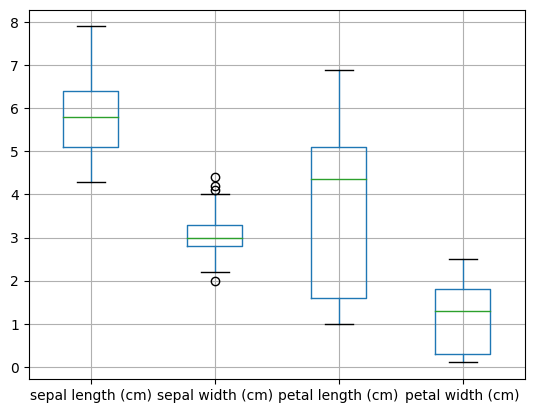

In [30]:
iris_df.boxplot()

<AxesSubplot: >

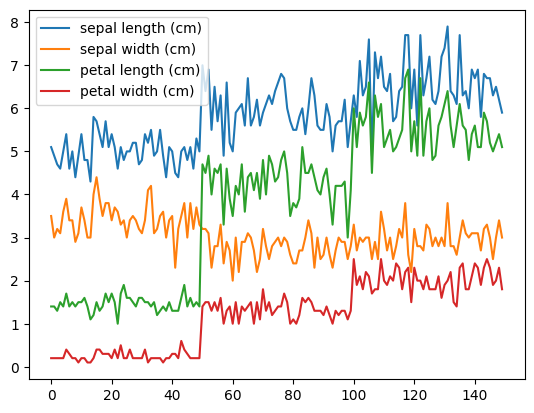

In [31]:
iris_df.plot()

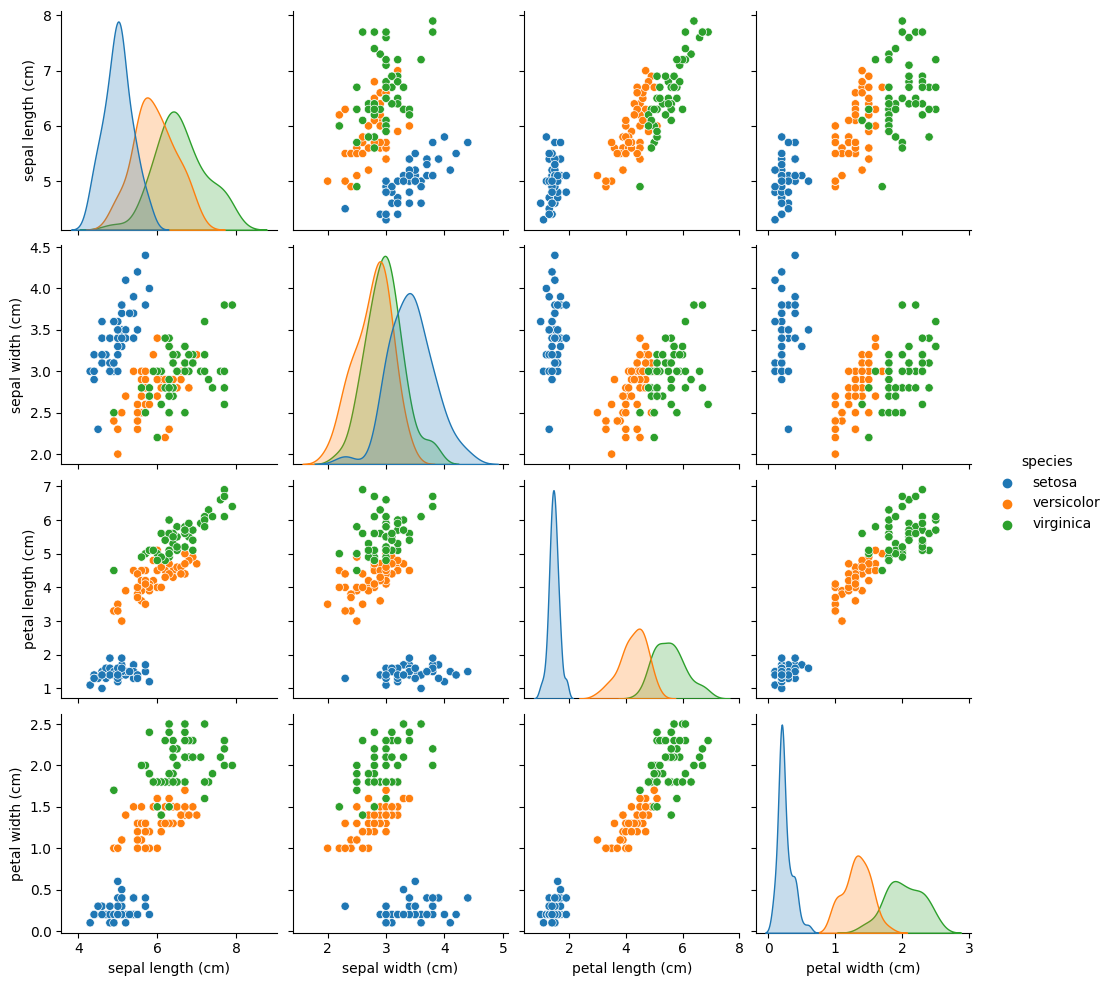

In [32]:
import seaborn as sns

sns.pairplot(iris_df, hue='species') # hue : 카테고리 값에 따라 색상을 다르게

### 붓꽃 데이터에 대한 로지스틱 회귀

In [31]:
from sklearn.model_selection import train_test_split

# petal로 예측
x_train, x_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target, 
                                                    test_size=0.2, random_state=1, stratify = iris.target)
# stratify : stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation 유지. 한 쪽에 쏠려서 분배되는 것을 방지 
# 분할된 샘플의 class 갯수가 동일한 비율로 유지

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

로지스틱 분류 파라미터
- solver = {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'} -> 기본값='lbfgs'
- multi_class = {‘auto’, ‘ovr’, ‘multinomial’}
-> 기본값=’auto’, 이진문제 : over, 다항 : multinomial

In [33]:
from sklearn.linear_model import LogisticRegression

# 최적화 전략
model = LogisticRegression(solver='lbfgs', # 최적화에 사용할 알고리즘 설정
                           multi_class='auto', 
                           C=100, # 규칙 강도의 역수 값(높은 C를 설정할수록, 낮은 강도의 제약조건, 강한 규제)
                           random_state=1)
model.fit(x_train, y_train)

LogisticRegression(C=100, random_state=1)

- solver ? 

In [34]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9666666666666667
Test Data Score: 0.9666666666666667


### GridSearch
- 관심있는 매개변수들을 대상으로 가능한 모든 조합을 시도
- Penalty
    - L2: Ridge, 일반적으로 사용 (default)
    - L1: LASSO, 변수가 많아서 줄여야할 때 사용, 모델의 단순화 및 해석에 용이
<br><br/>
- 주요 파라미터 C : class weight
    - default = 1
    - C값이 작으면 Penalty값이 강해지고 단순 모델이 됨
    - C값이 커지면 Penalty값이 약해짐. 정규화가 사라짐.
<br><br/>
- [ 참고 : GridSearchCV document ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [35]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

# 파라미터 후보
param_grid = [{'penalty' : ['l1', 'l2'],
               'C' : [2, 2.2, 2.4, 2.6, 2.8]}]

# 그리드 서치 진행
gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid,
                  scoring = 'accuracy', cv = 10, n_jobs = multiprocessing.cpu_count())
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=12,
             param_grid=[{'C': [2, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [36]:
result = gs.fit(iris.data, iris.target)

C:\Users\student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loc

In [37]:
print(gs.best_estimator_)

print('Best Score: {}'.format(gs.best_score_))
print('Best Parameter: {}'.format(gs.best_params_))
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.4)
Best Score: 0.9800000000000001
Best Parameter: {'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000698,0.000457,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.024140,0.002708,0.000598,0.000489,2,l2,"{'C': 2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000299,0.000457,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,0.025232,0.004846,0.000898,0.000537,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000798,0.000399,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
5,0.022540,0.001903,0.000499,0.000499,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000399,0.000489,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,0.022169,0.001760,0.000598,0.000488,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000399,0.000489,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
9,0.021785,0.002385,0.000598,0.000488,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


---